In [1]:
from dolfin import *
import numpy as np
import mshr
import matplotlib.pyplot as plt

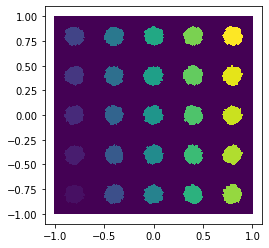

In [2]:
domain_circular_inclusion = mshr.Rectangle(Point(-1, -1), Point(1, 1))
for i in range(5):
    for j in range(5):
        domain_circular_inclusion.set_subdomain(5*i + j + 1, 
                             mshr.Circle(Point(-0.8 + 0.4*i, -0.8 + 0.4*j), 0.1))
        
mesh_circular_inclusion = mshr.generate_mesh(domain_circular_inclusion, 48)
# Define function space
V_circular_inclusion = FunctionSpace(mesh_circular_inclusion, 'P', 2)
# Define Mesh function to mark the coefficients
marker_circular_inclusion = MeshFunction('size_t', mesh_circular_inclusion, 2, 
                         mesh_circular_inclusion.domains())
dx_circular_inclusion = Measure('dx', domain=mesh_circular_inclusion, subdomain_data=marker_circular_inclusion)

plot(marker_circular_inclusion)

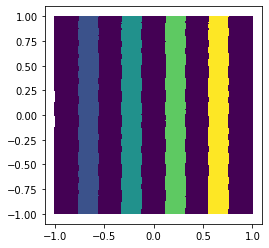

In [3]:
domain_laminate = mshr.Rectangle(Point(-1, -1), Point(1, 1))
for i in range(4):
    left = -1 + 0.24 + 0.44*i;
    right = left + 0.2
    domain_laminate.set_subdomain(i+1,
                              mshr.Rectangle(Point(left, -1), Point(right, 1)))
    
mesh_laminate = mshr.generate_mesh(domain_laminate, 24)
# Define function space
V_laminate = FunctionSpace(mesh_laminate, 'P', 2)
# Define Mesh function to mark the coefficients
marker_laminate = MeshFunction('size_t', mesh_laminate, 2, 
                         mesh_laminate.domains())
dx_laminate = Measure('dx', domain=mesh_laminate, subdomain_data=marker_laminate)

plot(marker_laminate)

In [4]:
# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary
bc_circular_inclusion = DirichletBC(V_circular_inclusion, Constant(0), boundary)
bc_laminate = DirichletBC(V_laminate, Constant(0), boundary)

In [5]:
class K(UserExpression):    
    def __init__(self, materials, k_0, k_1, **kargs):
        # Call superclass constructor with keyword arguments to properly
        # set up the instance.  It will get confused, though, if you
        # include your own keyword arguments in kwargs.  Since the body
        # of the function assumes these arguments will be passed, there
        # doesn't seem to be a good reason not to make them positional
        # arguments.
        super().__init__()
        
        self.materials = materials
        self.k_0 = k_0
        self.k_1 = k_1
        
    def eval_cell(self, values, x, cell):
        if self.materials[cell.index] == 0:
            values[0] = self.k_0
        else:
            values[0] = self.k_1
            
    def value_shape(self):
        return ()
    
kappa_circular_inclusion = K(marker_circular_inclusion, 1.0, 50, degree=0, element= V_circular_inclusion.ufl_element())
kappa_laminate = K(marker_laminate, 1.0, 50, degree=0, element=V_laminate.ufl_element())

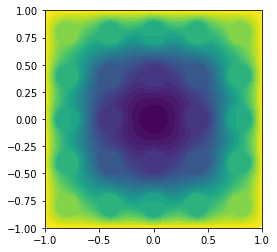

In [8]:
# Define variational problem
u = TrialFunction(V_circular_inclusion)
v = TestFunction(V_circular_inclusion)
f = Constant(-1.0)
a_circular_inclusion = kappa_circular_inclusion*dot(grad(u), grad(v))*dx_circular_inclusion
L = f * v * dx_circular_inclusion

# Compute solution
u_circular_inclusions = Function(V_circular_inclusion)
solve(a_circular_inclusion == L, u_circular_inclusions, bc_circular_inclusion)
plot(u_circular_inclusions)

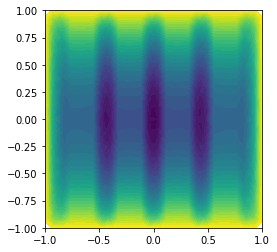

In [9]:
# Define variational problem
u = TrialFunction(V_laminate)
v = TestFunction(V_laminate)
f = Constant(-1.0)
a_laminate = kappa_laminate*dot(grad(u), grad(v))*dx_laminate
L = f * v * dx_laminate
# Compute solution
u_laminate = Function(V_laminate)
solve(a_laminate == L, u_laminate, bc_laminate)
plot(u_laminate)